# Football game recreation

## Data Analysis

Let's start by loading the provided datasets and conducting an analysis to understand the distribution and characteristics of the data.

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import numpy as np
import random

The data consists of labeled gaits with acceleration norms for each gait. Each dictionary represents one gait with a corresponding action label and a list of acceleration norms at a frequency of 50Hz.

In [44]:


# Load the data for match 1
with open("match_1.json", 'r') as file:
    match_1_data = json.load(file)
    
with open('match_2.json', 'r') as f:
    match_2_data = json.load(f)

# Display the first few entries
match_1_data[:5]
match_2_data[:5]


[{'label': 'no action',
  'norm': [104.42423889328715,
   87.63989343949717,
   128.5261849145872,
   85.28252761835475,
   114.84767339056773,
   112.2454499058008,
   75.9111979077955,
   190.31826717483398,
   33.54670351236696,
   102.45193075189341,
   157.4588553203466,
   35.93073011241273,
   230.65506620695248,
   241.47756946878408,
   55.10018529426276,
   243.29430015393393,
   98.11886721361198,
   119.15252911619854,
   17.7021950435132,
   106.8757730615181,
   25.191091466582904,
   64.95464057943082,
   21.34018862466842,
   27.936581347277734,
   24.894478636160866,
   19.6668617791697,
   24.923106439791056,
   20.98624822229277,
   17.829089223784226,
   20.216565100889593,
   19.614810550716726,
   18.014577404563546,
   20.9358821418966,
   19.001863870390064,
   18.785138161519633,
   19.646764608489203,
   19.51806473449375,
   21.184927281892637,
   19.030311046139317,
   17.34018483824069,
   18.028128954045318,
   18.028128954045318,
   20.413394692024728,
  

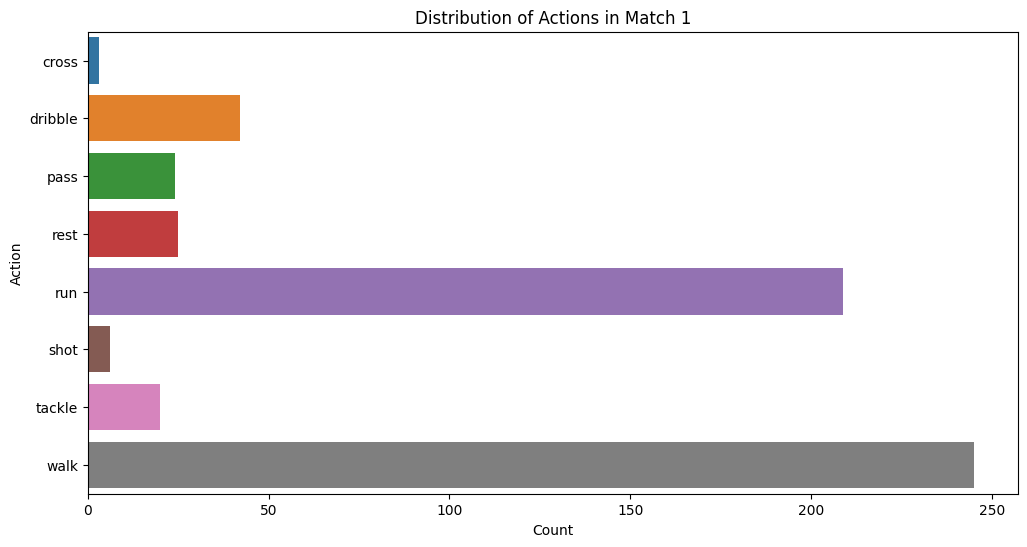

In [4]:
# Extract the labels from the data
labels = [entry['label'] for entry in match_1_data]

# Visualize the distribution of labels
plt.figure(figsize=(12, 6))
sns.countplot(y=labels, order = sorted(set(labels)))
plt.title("Distribution of Actions in Match 1")
plt.xlabel("Count")
plt.ylabel("Action")
plt.show()


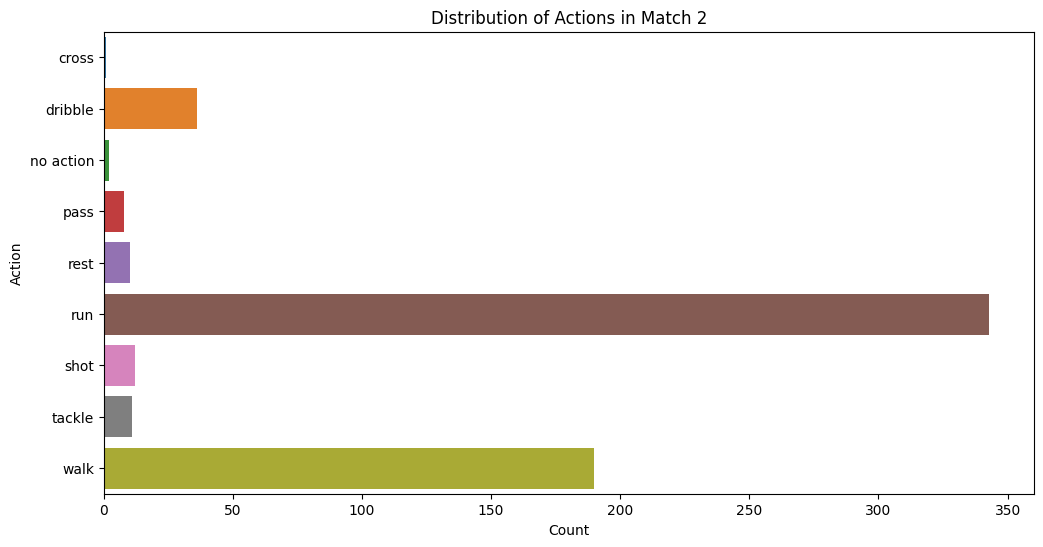

In [6]:
# Extract the labels from the data
labels = [entry['label'] for entry in match_2_data]

# Visualize the distribution of labels
plt.figure(figsize=(12, 6))
sns.countplot(y=labels, order = sorted(set(labels)))
plt.title("Distribution of Actions in Match 2")
plt.xlabel("Count")
plt.ylabel("Action")
plt.show()


The distribution plot shows that actions like "walk", "run", and "dribble" are the most frequent. On the other hand, actions like "shot", "cross", and "tackle" are less frequent, which is expected in the context of a football game.

Next, let's visualize the acceleration patterns for a few randomly selected gaits of different actions to see if there are noticeable differences in their patterns.

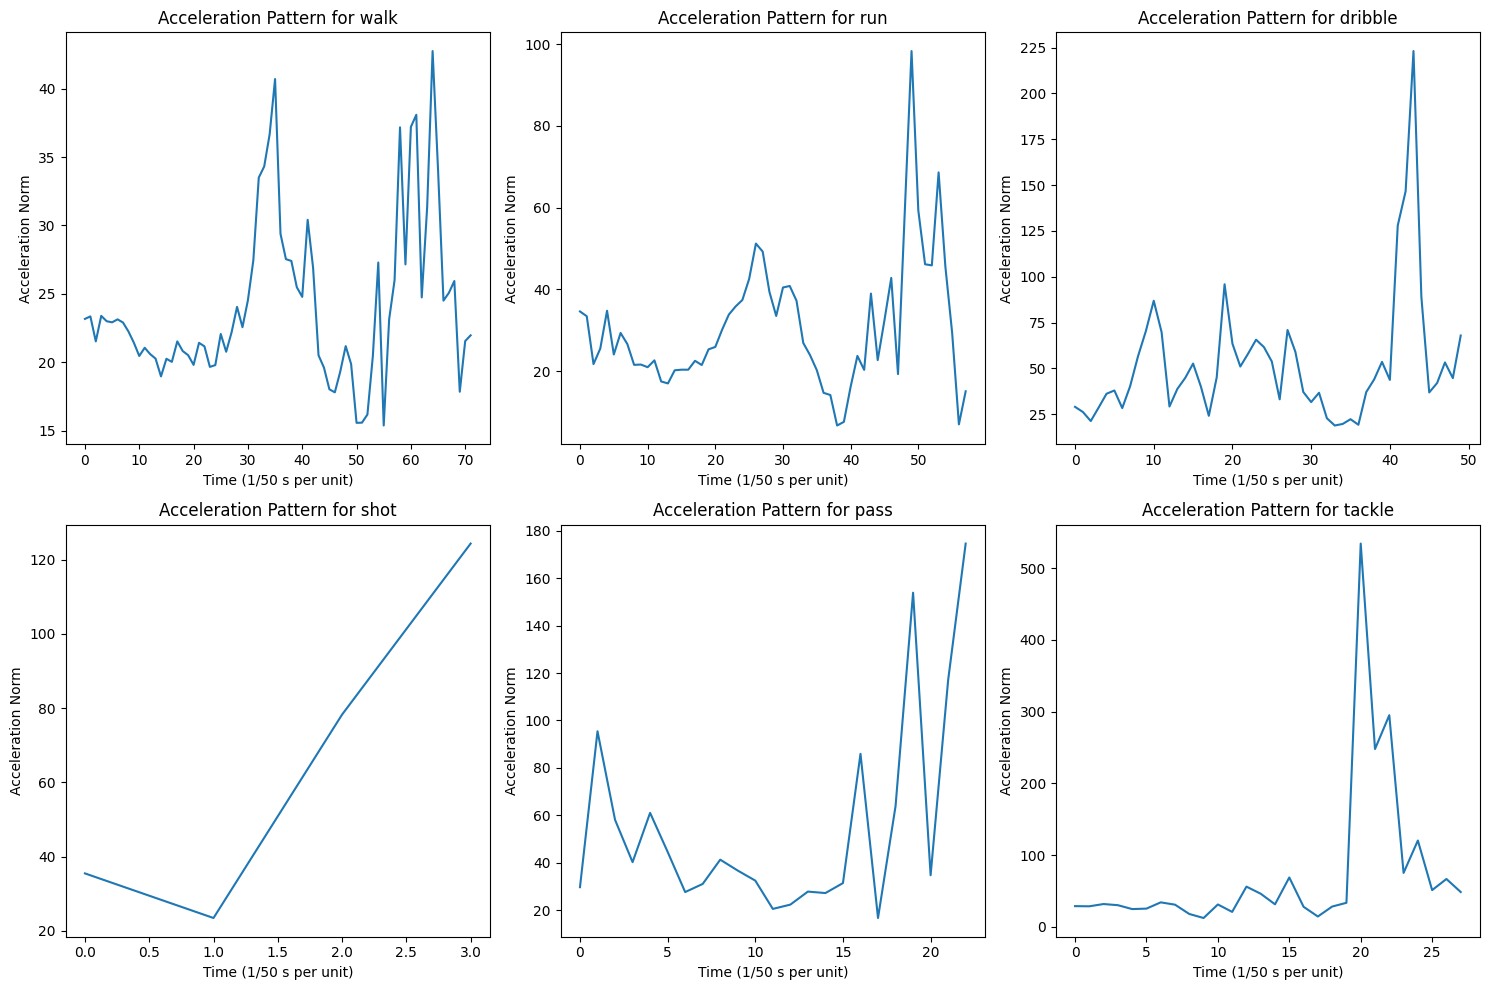

In [7]:
# Sample a few random gaits for different actions and plot them
actions_to_sample = ["walk", "run", "dribble", "shot", "pass", "tackle"]

plt.figure(figsize=(15, 10))

for idx, action in enumerate(actions_to_sample, 1):
    action_gaits = [entry for entry in match_1_data if entry['label'] == action]
    sampled_gait = action_gaits[0]['norm']  # Take the first gait for this action as a sample
    
    plt.subplot(2, 3, idx)
    plt.plot(sampled_gait)
    plt.title(f"Acceleration Pattern for {action}")
    plt.xlabel("Time (1/50 s per unit)")
    plt.ylabel("Acceleration Norm")

plt.tight_layout()
plt.show()


Acceleration Patterns in Different Actions :

- Walk: The acceleration pattern for walking seems relatively steady with minor peaks and valleys, reflecting the consistent pace of walking.

- Run: Running displays a more pronounced pattern, which is expected due to the alternating acceleration and deceleration as legs move during a sprint.

- Dribble: Dribbling shows a combination of walking and running characteristics since the player is controlling the ball, which might lead to varying speeds.

- Shot: The shot acceleration pattern showcases a sudden spike, indicating the rapid acceleration as the player strikes the ball.

- Pass: Passing also has a notable spike but might be less pronounced than a shot.

- Tackle: Tackling shows multiple peaks, which could be attributed to the player trying to block or interact with an opponent.

Next, let's compute some basic statistics (mean and standard deviation) for the acceleration norms of each action type to see if any patterns emerge.

In [10]:
# Compute mean and standard deviation for the acceleration norms of each action type
stats = {}
for action in set(labels):
    action_gaits = [entry['norm'] for entry in match_1_data if entry['label'] == action]
    
    # Flatten the list of gaits to compute overall mean and std for the action
    flattened_gaits = [value for gait in action_gaits for value in gait]
    
    mean_acc = np.mean(flattened_gaits)
    std_acc = np.std(flattened_gaits)
    
    stats[action] = {'mean': mean_acc, 'std': std_acc}

stats_df = pd.DataFrame(stats).transpose()

stats_df

c:\Users\fedil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\fedil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\fedil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\fedil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\fedil\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.

,mean,std
tackle,68.641166,81.259966
walk,27.545180,14.024195
pass,59.917892,63.194292
dribble,50.824108,42.298066
cross,46.742724,47.874277
run,52.533147,51.842663
rest,21.773252,4.607884
no action,NaN,NaN
shot,119.587210,123.258181


Here are the basic statistics (mean and standard deviation) for the acceleration norms of each action type:

- Cross: A relatively high mean and standard deviation, indicating variability in the way players cross the ball.

- Shot: The highest mean, reflecting the force exerted when taking a shot.

- Dribble: A moderate mean with a significant spread (standard deviation), which makes sense given the variable nature of dribbling.

- Tackle: High variability (standard deviation) in tackling, which can be due to the different ways and intensities players tackle opponents.

- Rest: The lowest mean and low variability, as players are relatively still.

- Pass: A higher mean than dribbling but lower than a shot, suggesting it's an intermediate action in terms of intensity.

- Run: Comparable to dribble in terms of the mean but with a slightly higher standard deviation.

- Walk: A low mean and moderate standard deviation, indicating consistent low-intensity movement with some variability.

From the analysis, we can observe that the mean acceleration can be indicative of the intensity of the action. Actions like "shot" and "tackle" involve rapid and forceful movements, leading to higher acceleration norms, while actions like "rest" and "walk" are less intense and have lower acceleration norms.

Analyzing the succession of actions can provide insights into the flow of the game. For instance, it's more likely that a "pass" follows a "dribble" rather than a "rest".

We'll approach this by:

- Creating a transition matrix that records how often one action follows another.
- Visualizing this matrix to better understand the flow of actions.

In [11]:
# Create a transition matrix
unique_labels = sorted(set(labels))
transition_matrix = pd.DataFrame(0, index=unique_labels, columns=unique_labels)

# Populate the transition matrix
for i in range(1, len(labels)):
    prev_action = labels[i-1]
    current_action = labels[i]
    transition_matrix.at[prev_action, current_action] += 1

transition_matrix


,cross,dribble,no action,pass,rest,run,shot,tackle,walk
cross,0,0,0,0,0,1,0,0,0
dribble,1,20,0,7,0,2,5,0,1
no action,0,0,0,0,0,1,0,0,1
pass,0,2,0,0,1,4,0,0,1
rest,0,0,0,0,0,1,0,0,9
run,0,8,0,1,0,285,3,7,39
shot,0,1,1,0,0,2,4,0,4
tackle,0,2,0,0,0,7,0,1,1
walk,0,3,0,0,9,40,0,3,134


The rows represent the starting action, and the columns represent the following action. Each cell in the matrix shows the count of times an action (column) followed the previous action (row).

For instance, looking at the "run" row, we can see that after a "run" action, a "run" action followed 285 times, a "walk" action followed 39 times, and a "dribble" action followed 8 times, among other transitions.

To better visualize this flow of actions, we can create a heatmap.

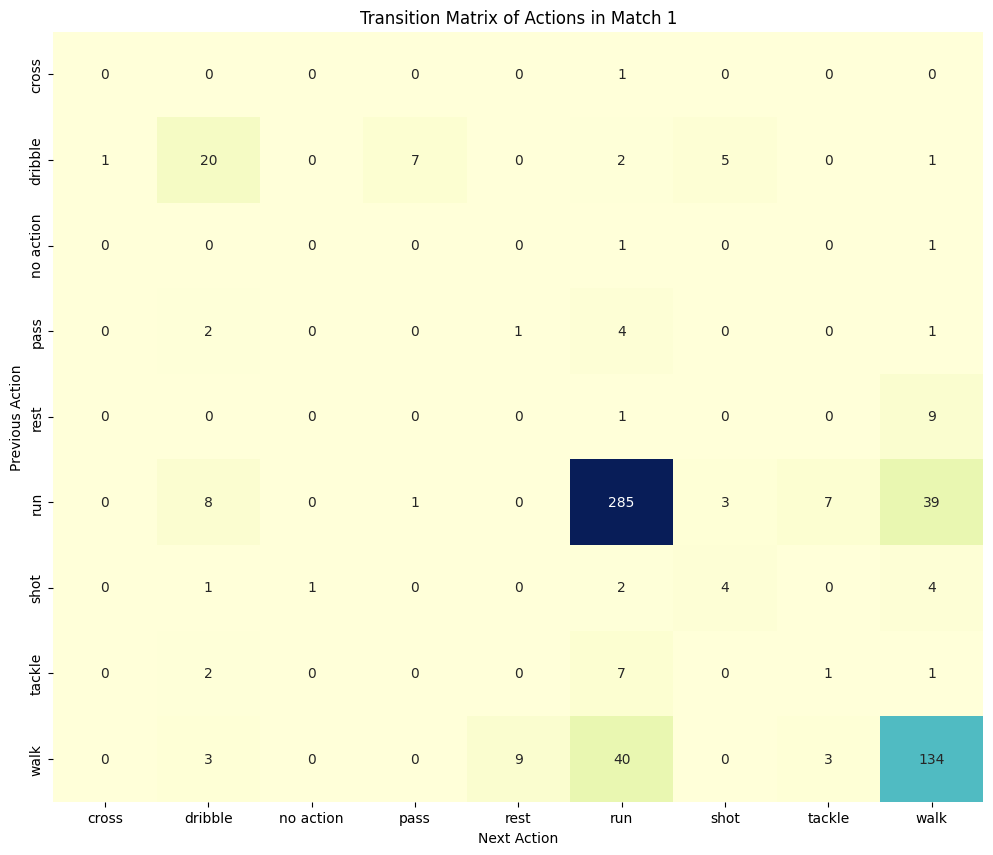

In [12]:
# Visualize the transition matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(transition_matrix, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
plt.title("Transition Matrix of Actions in Match 1")
plt.xlabel("Next Action")
plt.ylabel("Previous Action")
plt.show()


The heatmap provides a visual representation of the transition matrix. The color intensity indicates the frequency of transitions from one action to another:

Darker shades indicate a higher frequency of transitions between the actions.

Lighter shades or white cells indicate infrequent or no transitions between the actions.

Key observations:

- Run to Run: This is the most frequent transition, implying players often continue running after an initial run.

- Walk to Walk: Players often continue walking after an initial walking action.

- Run to Walk: After running, it's common for players to transition to walking.

- Walk to Run: Similarly, walking is often followed by running.

- Dribble to Run and Run to Dribble: Transitions between dribbling and running are also fairly common, indicating players often switch between controlling the ball and moving quickly.

- Actions like "shot" and "cross" have fewer transitions to other actions, which is expected as these are specific game events that don't occur as frequently.

In [13]:
# Extract the labels from the match 2 data
labels_match_2 = [entry['label'] for entry in match_2_data]

# Create a transition matrix for match 2
transition_matrix_match_2 = pd.DataFrame(0, index=unique_labels, columns=unique_labels)

# Populate the transition matrix for match 2
for i in range(1, len(labels_match_2)):
    prev_action = labels_match_2[i-1]
    current_action = labels_match_2[i]
    transition_matrix_match_2.at[prev_action, current_action] += 1

# Sum the transition matrices of match 1 and match 2
combined_transition_matrix = transition_matrix + transition_matrix_match_2

combined_transition_matrix


,cross,dribble,no action,pass,rest,run,shot,tackle,walk
cross,0,0,0,0,0,2,0,0,0
dribble,2,40,0,14,0,4,10,0,2
no action,0,0,0,0,0,2,0,0,2
pass,0,4,0,0,2,8,0,0,2
rest,0,0,0,0,0,2,0,0,18
run,0,16,0,2,0,570,6,14,78
shot,0,2,2,0,0,4,8,0,8
tackle,0,4,0,0,0,14,0,2,2
walk,0,6,0,0,18,80,0,6,268


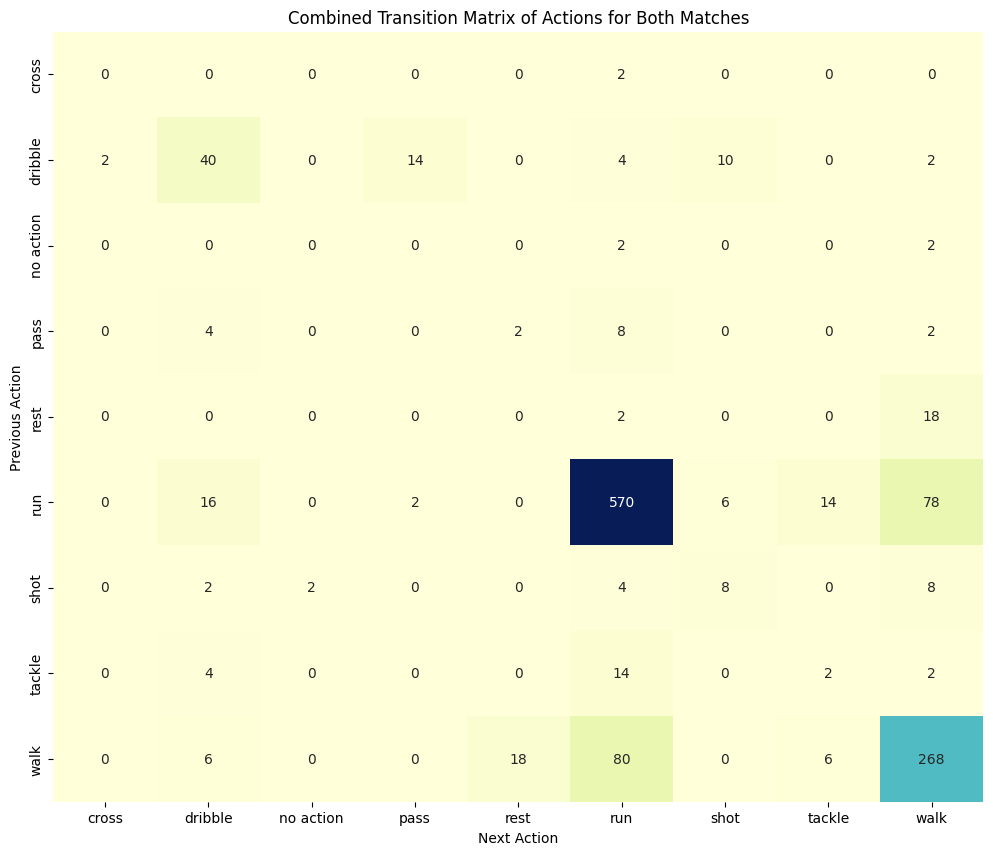

In [15]:
# Visualize the combined transition matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(combined_transition_matrix, cmap="YlGnBu", annot=True, fmt="d", cbar=False)
plt.title("Combined Transition Matrix of Actions for Both Matches")
plt.xlabel("Next Action")
plt.ylabel("Previous Action")
plt.show()


Next, we'll analyze the distribution of acceleration norms for each action from the combined data of both matches. This will help us generate realistic acceleration norms when recreating the game.

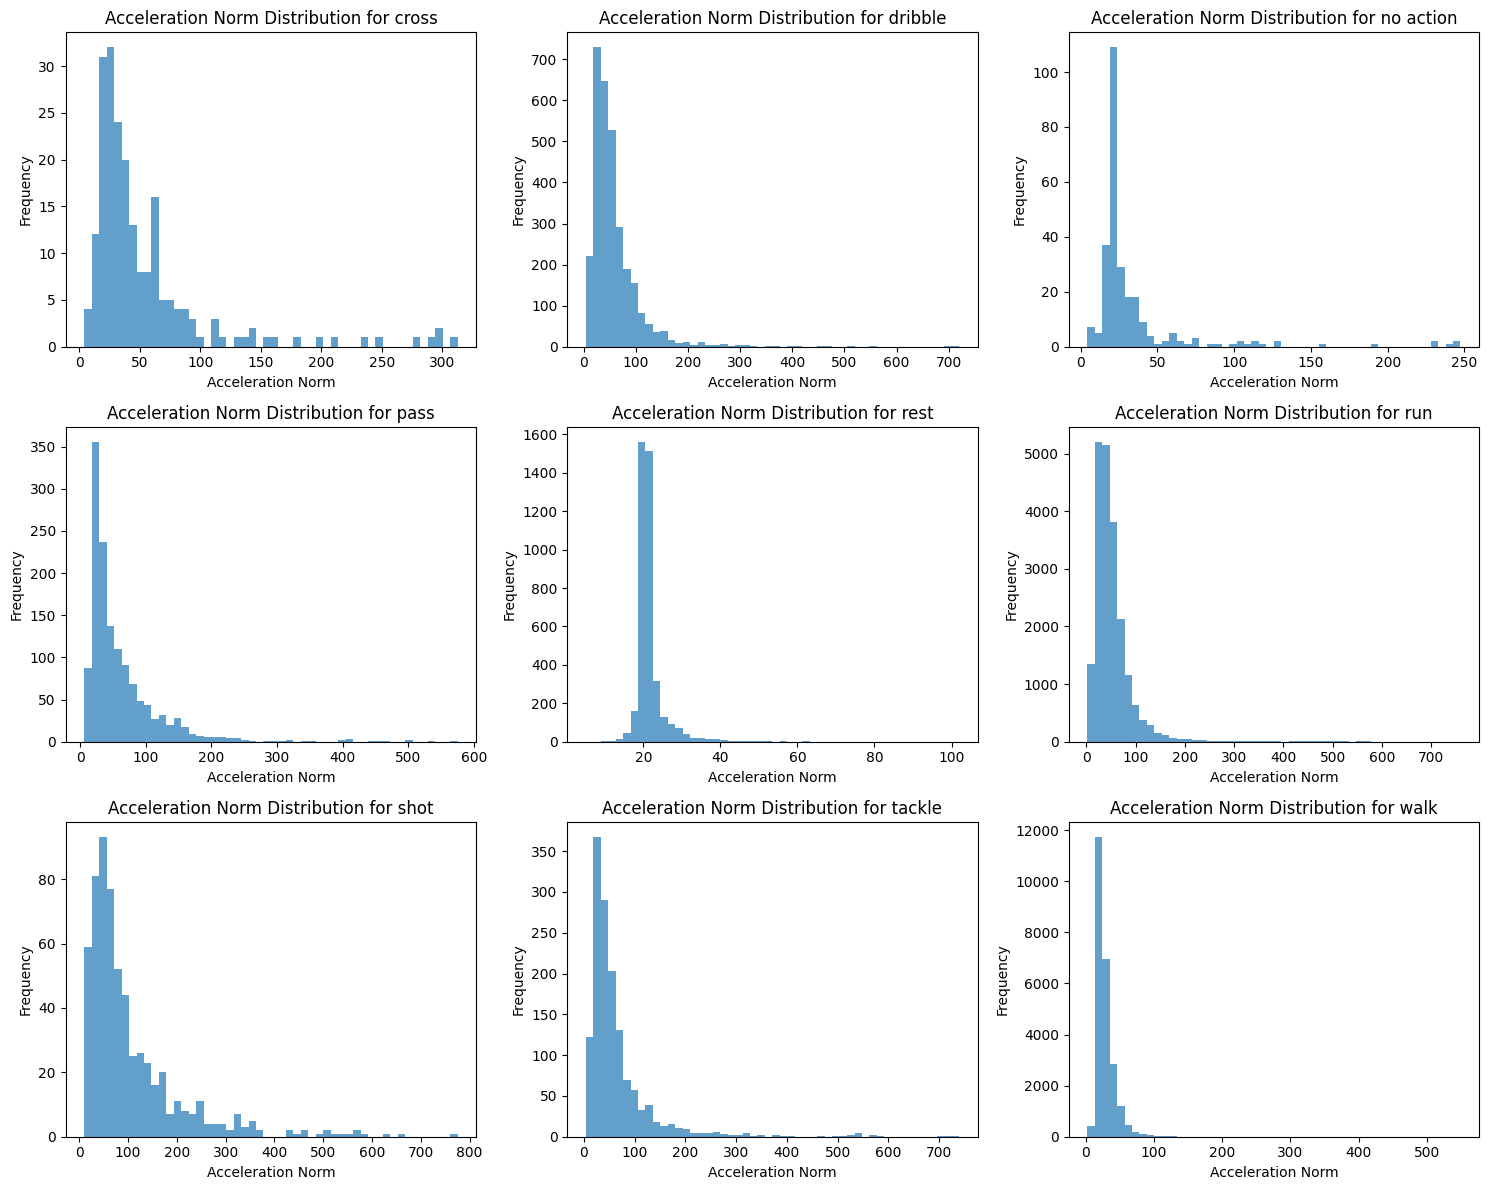

In [18]:
# Combine the data from both matches
combined_data = match_1_data + match_2_data

# Extract norms for each action and store in a dictionary
action_norms_distribution = {}
for action in all_unique_labels:
    action_norms = [entry['norm'] for entry in combined_data if entry['label'] == action]
    # Flatten the list of gaits for this action
    flattened_gaits = [value for gait in action_norms for value in gait]
    action_norms_distribution[action] = flattened_gaits

# Plot histograms for each action's acceleration norms
plt.figure(figsize=(15, 12))

for idx, action in enumerate(all_unique_labels, 1):
    plt.subplot(3, 3, idx)
    plt.hist(action_norms_distribution[action], bins=50, alpha=0.7)
    plt.title(f"Acceleration Norm Distribution for {action}")
    plt.xlabel("Acceleration Norm")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


The histograms showcase the distribution of acceleration norms for each action across both matches:

- Actions like "rest" and "walk" have norms concentrated at the lower end, indicating slower movements.

- "Run", "dribble", and "tackle" have wider distributions, reflecting the varied intensities during these actions.

- "Shot" and "pass" exhibit peaks at higher acceleration norms, corresponding to the forceful actions of shooting 
or passing the ball.

With these distributions in mind, we can generate realistic acceleration norms when recreating the game.

## Different approaches

#### Transition Matrix

**Description:** Utilizes the probability of transitioning from one action to another based on historical data.

**Data Used:** Historical sequence of actions.

#### Deep Learning with Recurrent Neural Networks (RNN) or Long Short-Term Memory (LSTM)

**Description:** These models are well-suited for time series and sequence prediction tasks. A trained model can predict the next sequence of actions.

**Data Used:** Historical sequence of actions, acceleration data.

#### Hidden Markov Models (HMM)

**Description:** Assumes the system being modeled is a Markov process with unobserved states. Useful for systems that have observable outputs depending on unobservable internal states.

**Data Used:** Historical sequence of actions.

#### Generative Adversarial Networks (GANs)

**Description:** GANs consist of two neural networks, a generator, and a discriminator, that are trained together. The generator tries to produce fake game sequences, while the discriminator tries to distinguish between real and fake sequences.

**Data Used:** Historical sequence of actions, acceleration data.

#### Agent-Based Modeling (ABM)

**Description:** Simulate each player as an individual agent with specific behaviors and rules. Interactions among agents can recreate game dynamics.

**Data Used:** Player positions, ball position, individual player statistics, game strategies.


#### Reinforcement Learning

**Description:** Models each player as an agent that learns to take actions based on rewards. Can be used to recreate game strategies and decisions.

**Data Used:** Historical game sequences, rewards for specific actions, player positions, ball position.

#### Spatial-Temporal Analysis

**Description:** Focuses on the spatial positioning of players and ball, analyzing how they change over time.

**Data Used:** Player tracking data, ball position, pitch dimensions.

#### Graph-based Models

**Description:** Models the game as a graph with players as nodes and passes or interactions as edges. Can be used to recreate passing networks or team formations.

**Data Used:** Player positions, pass sequences.

#### Video Analysis

**Description:** Uses video footage to recreate games. Advanced machine learning models can be employed to detect players, ball, and actions from raw video footage.

**Data Used:** Video footage of matches, computer vision models for player and ball detection.


## Game Recreation

Let's begin by defining the constraints on gait length. 

In [17]:
# Define constraints for gait length
MIN_GAIT_LENGTH = 5    # 0.1s at 50Hz
MAX_GAIT_LENGTH = 150  # 3s at 50Hz

MIN_GAIT_LENGTH, MAX_GAIT_LENGTH

(5, 150)

The constraints for gait length are set as follows:

Minimum gait length: 5 data points (0.1 seconds at 50Hz)

Maximum gait length: 150 data points (3 seconds at 50Hz)

Next, let's generate a sequence of actions using the transition matrix. We'll ensure that the generated sequence makes logical sense and avoids repeated suspicious patterns.

In [27]:
def generate_action_sequence(transition_matrix, num_actions=1000):
    """Generate a sequence of actions based on transition probabilities."""
    # Start with a random action
    current_action = random.choice(transition_matrix.index.tolist())
    action_sequence = [current_action]

    for _ in range(num_actions - 1):
        # Get probabilities of next actions based on current action
        next_action_probabilities = transition_matrix.loc[current_action].values
        next_action_probabilities = next_action_probabilities / next_action_probabilities.sum()

        # Choose the next action based on these probabilities
        next_action = np.random.choice(transition_matrix.columns, p=next_action_probabilities)
        action_sequence.append(next_action)
        current_action = next_action

    return action_sequence

# Generate a sequence of actions
generated_actions = generate_action_sequence(combined_transition_matrix_updated)

generated_actions[:20]  # Display the first 20 actions of the generated sequence

['rest',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'walk',
 'dribble',
 'shot',
 'no action',
 'walk',
 'walk']

Next, for each generated action, we'll produce a corresponding list of acceleration norms. We'll base these on the earlier analyzed distributions and ensure they fall within our defined gait length constraints.

In [28]:
def generate_acceleration_norms(action, distribution, min_length, max_length):
    """Generate acceleration norms for a given action."""
    # Randomly choose a gait length within the constraints
    gait_length = random.randint(min_length, max_length)
    
    # Sample acceleration norms based on the distribution for the action
    generated_norms = np.random.choice(distribution[action], size=gait_length)
    
    return generated_norms.tolist()

# Generate acceleration norms for each action in the sequence
generated_norms = [generate_acceleration_norms(action, action_norms_distribution, MIN_GAIT_LENGTH, MAX_GAIT_LENGTH) 
                   for action in generated_actions]

# Combine generated actions and norms into the desired format
recreated_game = [{'label': action, 'norm': norm} for action, norm in zip(generated_actions, generated_norms)]

recreated_game[:5]  # Display the first 5 entries of the recreated game


[{'label': 'rest',
  'norm': [19.901875292538797,
   24.483021364738462,
   21.46340425550446,
   19.630186123699396,
   15.781380481320712,
   19.31293921809153,
   20.536070667410456,
   23.84038412091678,
   15.444534257601443,
   16.993187368370982,
   21.227839498051164,
   20.106916641565505,
   20.60654003454132,
   20.76204911393549,
   21.528907402587212,
   21.444505380090952,
   20.488782538686237,
   19.355297329485467,
   22.44554726800706,
   20.748788064789593,
   21.665909971796232,
   18.679886850197153,
   19.955811096608624,
   19.227019142123048,
   20.52762482805694,
   19.838267840002494,
   19.630186123699396,
   20.54000767897166,
   20.96213553561978,
   34.5706660493452,
   19.60394650375549,
   20.536070667410456,
   22.972429601875252,
   20.488782538686237,
   20.825249931898718,
   20.748893717391482,
   18.93953902407017,
   18.34709804797959,
   21.14403350599052,
   20.21364214195322,
   19.955811096608624,
   19.37789329288645,
   20.2692547793572,
   

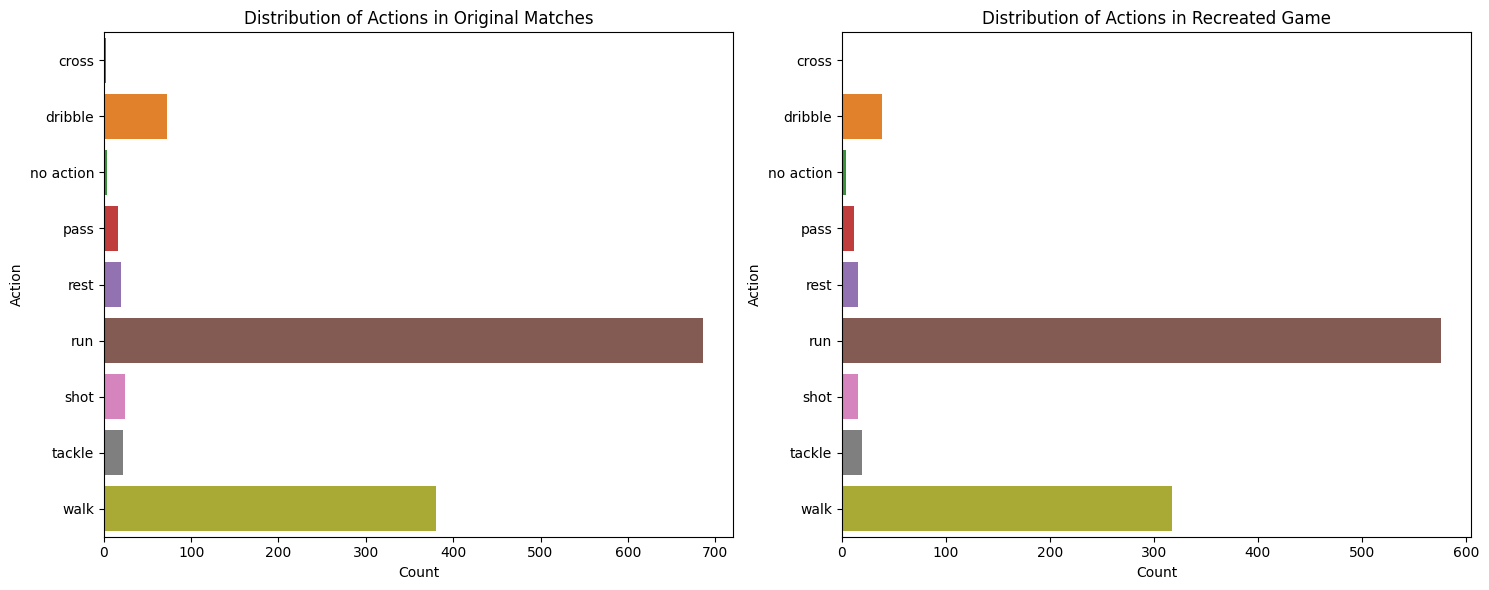

In [30]:
# Extract labels from the recreated game
recreated_labels = [entry['label'] for entry in recreated_game]

# Visualize the distribution of labels for original matches vs. recreated game
plt.figure(figsize=(15, 6))

# Original matches
plt.subplot(1, 2, 1)
sns.countplot(y=labels + labels_match_2, order=all_unique_labels)
plt.title("Distribution of Actions in Original Matches")
plt.xlabel("Count")
plt.ylabel("Action")

# Recreated game
plt.subplot(1, 2, 2)
sns.countplot(y=recreated_labels, order=all_unique_labels)
plt.title("Distribution of Actions in Recreated Game")
plt.xlabel("Count")
plt.ylabel("Action")

plt.tight_layout()
plt.show()


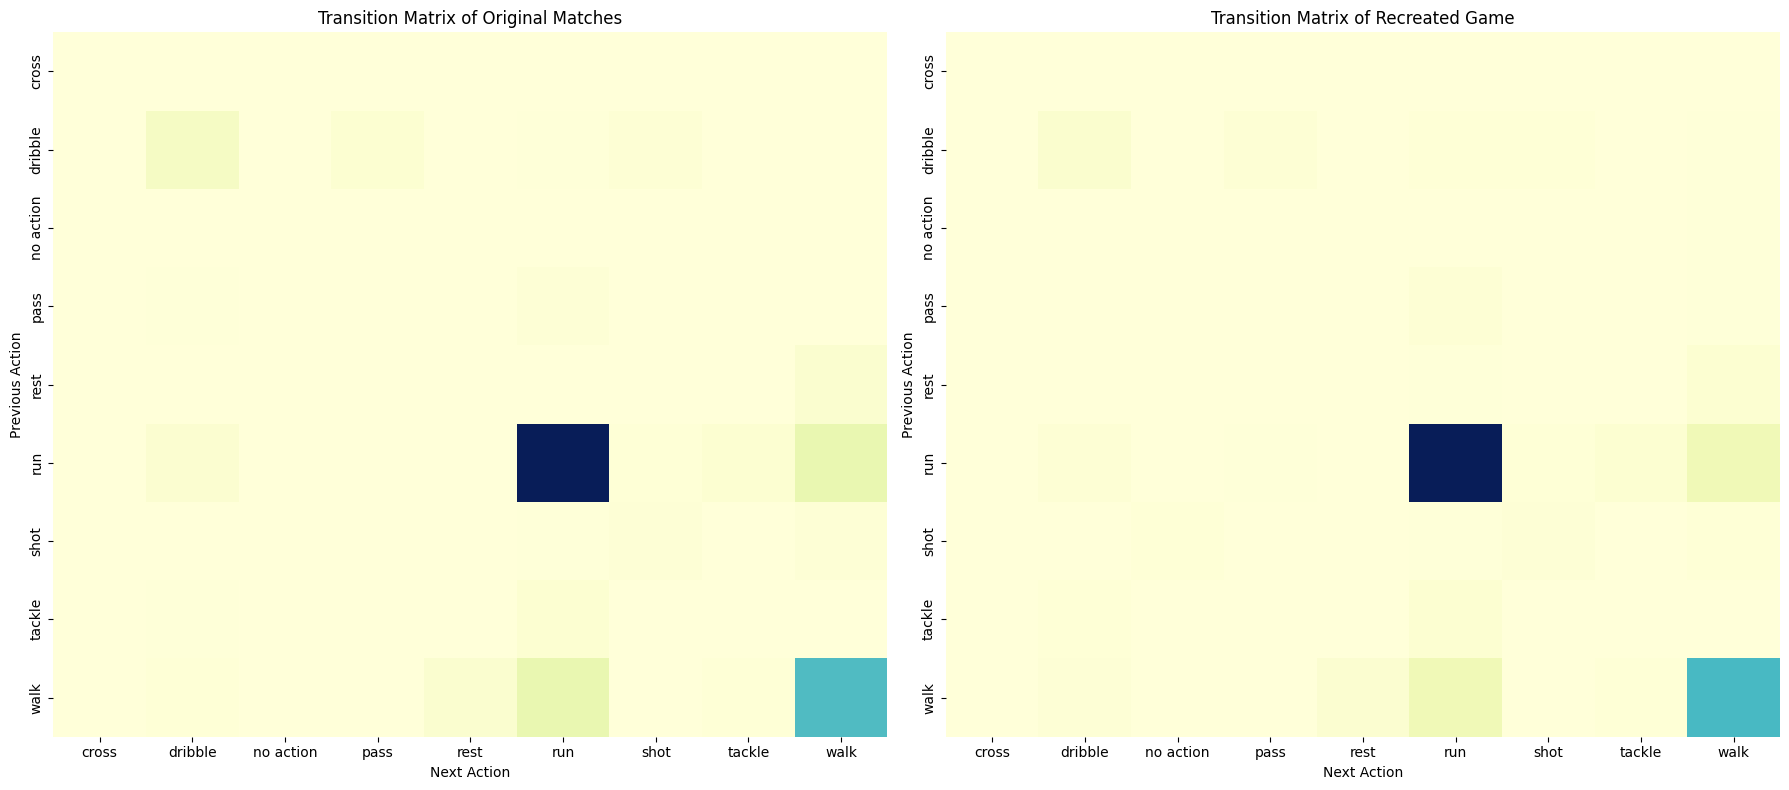

In [31]:
# Create a transition matrix for the recreated game
recreated_transition_matrix = pd.DataFrame(0, index=all_unique_labels, columns=all_unique_labels)

# Populate the transition matrix for the recreated game
for i in range(1, len(recreated_labels)):
    prev_action = recreated_labels[i-1]
    current_action = recreated_labels[i]
    recreated_transition_matrix.at[prev_action, current_action] += 1

# Normalize the matrices for better comparison
normalized_original_transition = combined_transition_matrix_updated / combined_transition_matrix_updated.sum().sum()
normalized_recreated_transition = recreated_transition_matrix / recreated_transition_matrix.sum().sum()

# Visualize the transition matrices using heatmaps
plt.figure(figsize=(18, 8))

# Original transition matrix
plt.subplot(1, 2, 1)
sns.heatmap(normalized_original_transition, cmap="YlGnBu", cbar=False)
plt.title("Transition Matrix of Original Matches")
plt.xlabel("Next Action")
plt.ylabel("Previous Action")

# Recreated game transition matrix
plt.subplot(1, 2, 2)
sns.heatmap(normalized_recreated_transition, cmap="YlGnBu", cbar=False)
plt.title("Transition Matrix of Recreated Game")
plt.xlabel("Next Action")
plt.ylabel("Previous Action")

plt.tight_layout()
plt.show()


C:\Users\fedil\AppData\Local\Temp\ipykernel_10668\525786494.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(action_norms_distribution[action], label="Original Matches", shade=True, alpha=0.5)
C:\Users\fedil\AppData\Local\Temp\ipykernel_10668\525786494.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(recreated_action_norms, label="Recreated Game", shade=True, alpha=0.5)
C:\Users\fedil\AppData\Local\Temp\ipykernel_10668\525786494.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(action_norms_distribution[action], label="Original Matches", shade=True, alpha=0.5)
C:\Users\fedil\AppData\Local\Temp\ipykernel_10668\

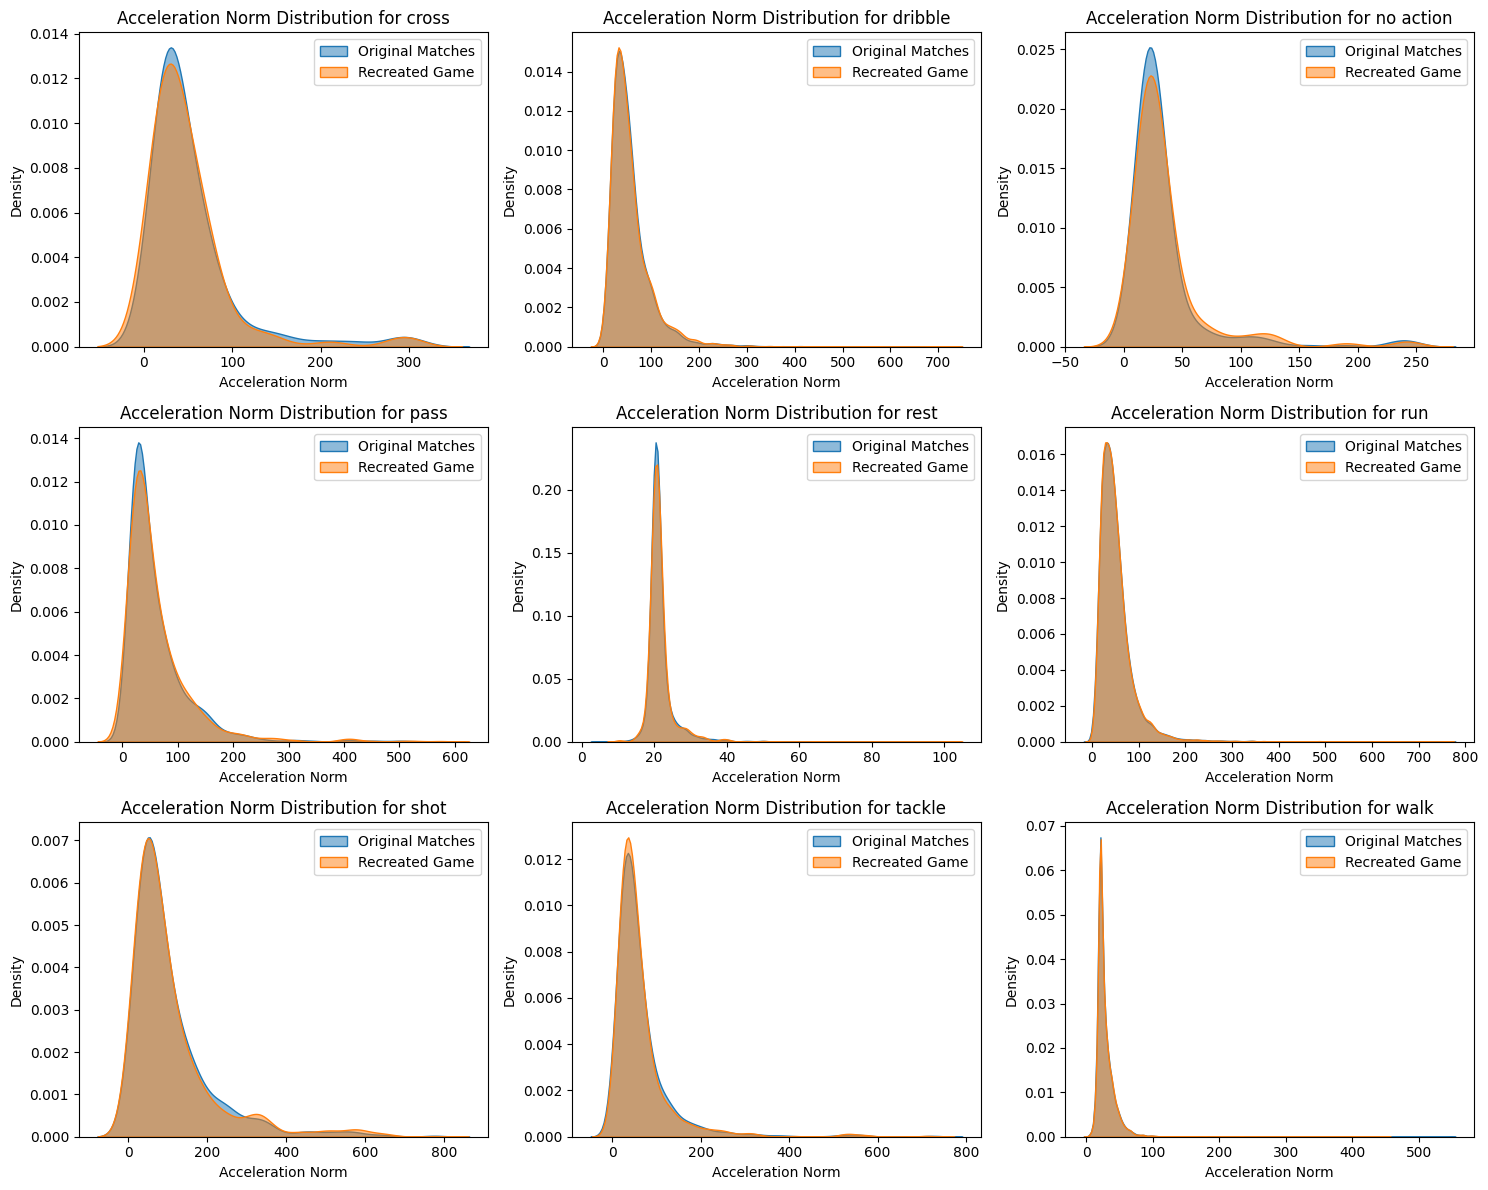

In [32]:
# Extract norms from the recreated game
recreated_norms = [entry['norm'] for entry in recreated_game]
recreated_norms_flat = [value for norm in recreated_norms for value in norm]

# Plot histograms for each action's acceleration norms: original matches vs. recreated game
plt.figure(figsize=(15, 12))

for idx, action in enumerate(all_unique_labels, 1):
    plt.subplot(3, 3, idx)
    
    # Original matches norms
    sns.kdeplot(action_norms_distribution[action], label="Original Matches", shade=True, alpha=0.5)
    
    # Recreated game norms
    recreated_action_norms = [value for entry, label in zip(recreated_norms, recreated_labels) 
                              if label == action for value in entry]
    sns.kdeplot(recreated_action_norms, label="Recreated Game", shade=True, alpha=0.5)
    
    plt.title(f"Acceleration Norm Distribution for {action}")
    plt.xlabel("Acceleration Norm")
    plt.ylabel("Density")
    plt.legend()

plt.tight_layout()
plt.show()


The similarity between the recreated data and the original data is due to the approach we took in recreating the game. 

Yet, it's essential to note the following:

If the recreated data is too similar to the original data, it might mean that the generated sequences are overfitting to the original matches, i.e., the recreation may lack variability or novelty.

## Approach: LSTM for Football Game Recreation

#### 1. Chosen Architecture: LSTM Network

Why use LSTM?

- Football game data is inherently sequential. LSTMs are explicitly designed to handle sequential data, capturing long-term dependencies and patterns.
- LSTMs have memory cells that can store and retrieve information over long sequences, making them suitable for capturing the nuances of a football game.
- LSTMs can model both the sequence of actions and the corresponding acceleration norms.


Architecture Overview:

- Input Layer: Takes in a sequence of actions (encoded as integers) and corresponding acceleration norms.
- Embedding Layer: Converts the integer-encoded actions into dense vectors of fixed size.
- LSTM Layers: Multiple LSTM layers to capture the sequential dependencies.
- Output Layer: Two outputs:
    - A softmax layer for predicting the next action (classification).
    - A linear layer for predicting the acceleration norm (regression).
    
#### 2. Pre-processing:

- Convert action labels (e.g., 'run', 'walk', 'shot') into integer encodings. This transformation is necessary for the embedding layer.

- Normalize acceleration norms to bring them into a similar scale (0 to 1, for instance). This normalization helps the model converge faster.

- The LSTM expects fixed-length input sequences. Therefore, shorter sequences will be padded (with zeros), and longer sequences might be truncated.

#### 3. Post-processing:

- Convert the integer predictions back into their corresponding action labels.

- Rescale the predicted acceleration norms back to their original range using the parameters from the normalization step during pre-processing.

#### 4. Flowchart:
To visualize the entire process, imagine the following flow:

- Input: Sequence of actions and acceleration norms.
- Pre-processing: Encode actions, normalize acceleration norms, and pad sequences.
- LSTM Network: Process the sequences through embedding, LSTM layers, and produce predictions.
- Post-processing: Decode predicted actions and rescale acceleration norms.
- Output: Predicted sequence of actions and corresponding acceleration norms for the next timestep.


This approach can be further enhanced with more sophisticated architectures like Bidirectional LSTMs, attention mechanisms, or even transformers if the dataset is significantly large. However, the described LSTM-based method provides a robust starting point for modeling sequential football game data.

We can try a simple implementation to see what it would look like :

In [48]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Embedding, concatenate
from keras.utils import to_categorical
from keras.optimizers import Adam
import numpy as np

match_1_game_labels = [entry['label'] for entry in match_1_data]

# Load the generated game for comparison (to extract all unique labels)
with open("generated_game_1.json", "r") as file:
    flattened_generated_game = json.load(file)

flattened_generated_game_labels = [entry['label'] for entry in flattened_generated_game]

# Proceed with data preparation for LSTM
# Encode action labels into integer encodings
label_encoder = LabelEncoder()
all_labels = flattened_generated_game_labels + match_1_game_labels  # combine labels from both games
label_encoder.fit(all_labels)

# Normalize acceleration norms
norms = [entry['norm'] for entry in match_1_data]  # using match_1_game for training
flattened_norms = [norm for sublist in norms for norm in sublist]
scaler = MinMaxScaler()
scaled_norms = scaler.fit_transform(np.array(flattened_norms).reshape(-1, 1))

# Prepare input sequences and their corresponding targets
sequence_length = 10  # arbitrary choice; can be tuned
num_classes = len(label_encoder.classes_)

# Encode match_1_game labels
encoded_labels = label_encoder.transform(match_1_game_labels)

# Prepare sequences
X_labels = []
X_norms = []
y_labels = []
y_norms = []

for i in range(0, len(encoded_labels) - sequence_length):
    X_labels.append(encoded_labels[i:i+sequence_length])
    X_norms.append(scaled_norms[i:i+sequence_length].ravel())
    y_labels.append(encoded_labels[i+sequence_length])
    y_norms.append(scaled_norms[i+sequence_length].ravel())

X_labels = np.array(X_labels)
X_norms = np.array(X_norms)
y_labels = to_categorical(np.array(y_labels), num_classes=num_classes)  # one-hot encode for softmax
y_norms = np.array(y_norms)

X_labels.shape, X_norms.shape, y_labels.shape, y_norms.shape


((564, 10), (564, 10), (564, 8), (564, 1))

##### Model Building

Since we have a multi-output model (classification for actions and regression for acceleration norms), we'll likely use a combination of categorical cross-entropy (for action prediction) and mean squared error (for acceleration norm prediction).

In [49]:

# Define inputs
input_labels = Input(shape=(10,))
input_norms = Input(shape=(10,1))

# Embedding layer for labels
embedded_labels = Embedding(input_dim=num_classes, output_dim=50, input_length=10)(input_labels)

# Concatenate embedded labels and norms
concatenated_inputs = concatenate([embedded_labels, input_norms], axis=2)

# LSTM layers
lstm_out = LSTM(100, return_sequences=False)(concatenated_inputs)

# Outputs
output_labels = Dense(num_classes, activation='softmax')(lstm_out)
output_norms = Dense(1)(lstm_out)

# Model definition
model = Model(inputs=[input_labels, input_norms], outputs=[output_labels, output_norms])

# Compile the model
model.compile(optimizer='adam', 
              loss=['categorical_crossentropy', 'mean_squared_error'], 
              metrics=['accuracy'])

# Print model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 10, 50)       400         ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, 10, 1)]      0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 10, 51)       0           ['embedding[0][0]',              
                                                                  'input_2[0][0]']            

##### Training

In [50]:
# Reshape X_norms for LSTM
X_norms_reshaped = X_norms.reshape(X_norms.shape[0], X_norms.shape[1], 1)

# Train the model
history = model.fit([X_labels, X_norms_reshaped], [y_labels, y_norms], 
                    epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
15/15 [==============================] - 3s 47ms/step - loss: 1.9627 - dense_loss: 1.9622 - dense_1_loss: 4.9175e-04 - dense_accuracy: 0.4878 - dense_1_accuracy: 0.0000e+00 - val_loss: 1.7095 - val_dense_loss: 1.7086 - val_dense_1_loss: 9.6199e-04 - val_dense_accuracy: 0.4779 - val_dense_1_accuracy: 0.0000e+00
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 1.4229 - dense_loss: 1.4224 - dense_1_loss: 5.0738e-04 - dense_accuracy: 0.5588 - dense_1_accuracy: 0.0000e+00 - val_loss: 1.4970 - val_dense_loss: 1.4966 - val_dense_1_loss: 3.5943e-04 - val_dense_accuracy: 0.4248 - val_dense_1_accuracy: 0.0000e+00
Epoch 3/100
15/15 [==============================] - 0s 9ms/step - loss: 1.3137 - dense_loss: 1.3135 - dense_1_loss: 1.8573e-04 - dense_accuracy: 0.5521 - dense_1_accuracy: 0.0000e+00 - val_loss: 1.4106 - val_dense_loss: 1.4103 - val_dense_1_loss: 3.7605e-04 - val_dense_accuracy: 0.5044 - val_dense_1_accuracy: 0.0000e+00
Epoch 4/100
15/15 [===========

- The accuracy for predicting actions (dense_accuracy) on the training data seems to have improved significantly and is around 88.03% in the final epoch. This suggests that the model has learned patterns in the training data.

- The accuracy for predicting actions on the validation data (val_dense_accuracy) is 49.56% in the final epoch. This is considerably lower than the training accuracy, indicating that the model may be overfitting. Overfitting occurs when the model performs well on the training data but struggles with unseen data (in this case, the validation set).

- The mean squared error for predicting acceleration norms (dense_1_loss and val_dense_1_loss for training and validation, respectively) is relatively low. This suggests that the model is relatively good at predicting the acceleration norms.

What we could do to improve this :

- Introducing dropout layers or L1/L2 regularization in the LSTM network can help in reducing overfitting.

- If overfitting persists, we could try simplifying the model by reducing the number of LSTM units or layers.

- Introducing some form of data augmentation, such as minor perturbations in the acceleration norms or introducing noise, can help the model generalize better.

However, we will go on with the transition matrix method since it will probably give better results in less time, as we do not have enough data to properly train this LSTM Model.

In [37]:
def estimate_average_duration(data):
    """Estimate average duration (in seconds) between actions based on the dataset."""
    total_lengths = sum(len(entry['norm']) for entry in data)
    average_length = total_lengths / len(data)
    # Convert from data points to seconds (50Hz sampling rate)
    return average_length / 50

def modify_transition_for_playstyle(transition_matrix, playstyle):
    """Adjust the transition matrix based on the desired playstyle."""
    adjusted_matrix = transition_matrix.copy()
    
    if playstyle == "attacking":
        adjusted_matrix["pass"] *= 1.5
        adjusted_matrix["shot"] *= 2
        adjusted_matrix["dribble"] *= 1.5

    elif playstyle == "defending":
        adjusted_matrix["tackle"] *= 2
        
    
    # Normalize each row to ensure probabilities sum to 1
    adjusted_matrix = adjusted_matrix.div(adjusted_matrix.sum(axis=1), axis=0)
    
    return adjusted_matrix

def generate_custom_game(data, transition_matrix, game_length_minutes=90, playstyle="normal", num_games=1):
    """Generate custom games based on specified parameters."""
    
    # Estimate average duration between actions
    avg_duration = estimate_average_duration(data)
    
    # Calculate approximate number of actions for the desired game length
    actions_per_minute = 60 / avg_duration
    total_actions = int(game_length_minutes * actions_per_minute)
    
    # Adjust the transition matrix for the playstyle
    adjusted_matrix = modify_transition_for_playstyle(transition_matrix, playstyle)
    
    # Generate games
    games = []
    for _ in range(num_games):
        game_actions = generate_action_sequence(adjusted_matrix, total_actions)
        game_norms = [generate_acceleration_norms(action, action_norms_distribution, MIN_GAIT_LENGTH, MAX_GAIT_LENGTH) 
                      for action in game_actions]
        game = [{'label': action, 'norm': norm} for action, norm in zip(game_actions, game_norms)]
        games.append(game)
    
    return games

# Generate a sample custom game (15 minutes, attacking and defending style)
sample_attacking_game = generate_custom_game(combined_data, combined_transition_matrix_updated, 
                                   game_length_minutes=15, playstyle="attacking", num_games=1)

sample_defending_game = generate_custom_game(combined_data, combined_transition_matrix_updated,game_length_minutes=15, playstyle="defending", num_games=1)




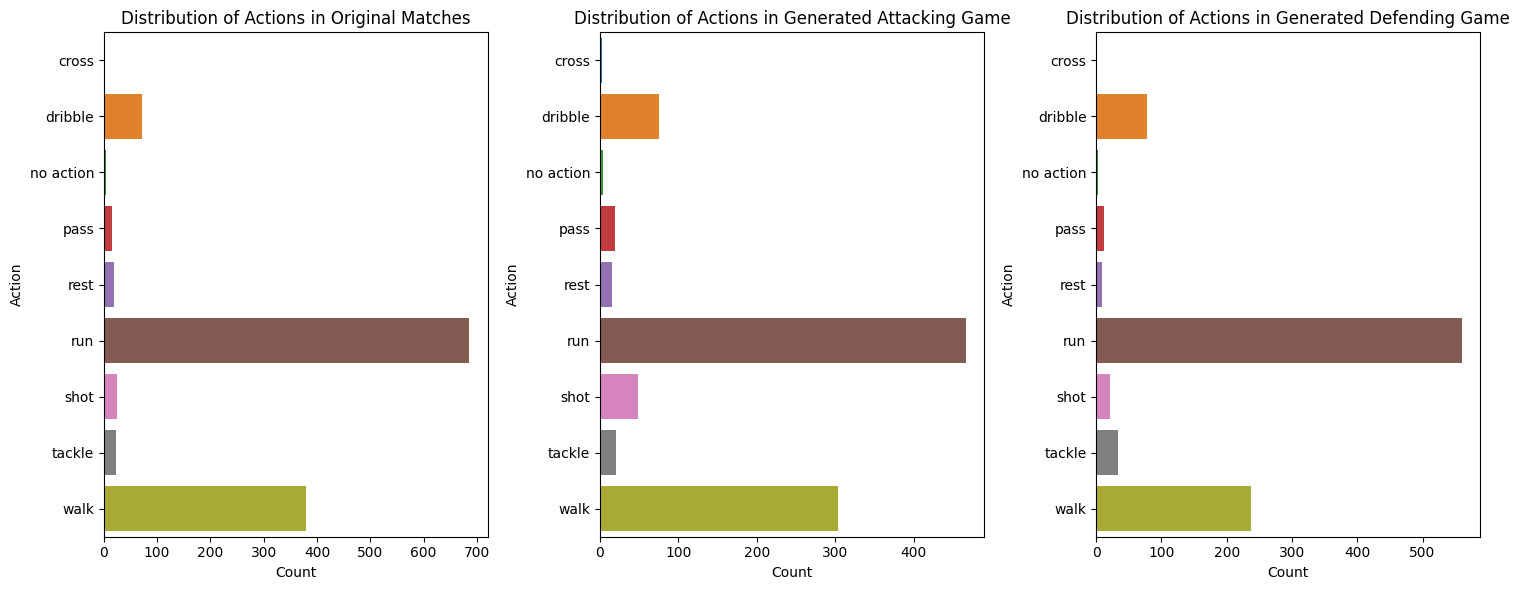

In [38]:
# Extract labels from the generated sample game
generated_attacking_labels = [entry['label'] for entry in sample_attacking_game[0]]
generated_defending_labels = [entry['label'] for entry in sample_defending_game[0]]

# Visualize the distribution of labels for original matches vs. generated sample game
plt.figure(figsize=(15, 6))

# Original matches
plt.subplot(1, 3, 1)
sns.countplot(y=labels + labels_match_2, order=all_unique_labels)
plt.title("Distribution of Actions in Original Matches")
plt.xlabel("Count")
plt.ylabel("Action")

# Generated attacking game
plt.subplot(1, 3, 2)
sns.countplot(y=generated_attacking_labels, order=all_unique_labels)
plt.title("Distribution of Actions in Generated Attacking Game")
plt.xlabel("Count")
plt.ylabel("Action")

# Generated defending game
plt.subplot(1, 3, 3)
sns.countplot(y=generated_defending_labels, order=all_unique_labels)
plt.title("Distribution of Actions in Generated Defending Game")
plt.xlabel("Count")
plt.ylabel("Action")

plt.tight_layout()
plt.show()
